In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data,columns=[boston.feature_names.tolist()])
df['Target'] = boston.target

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## EDA

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

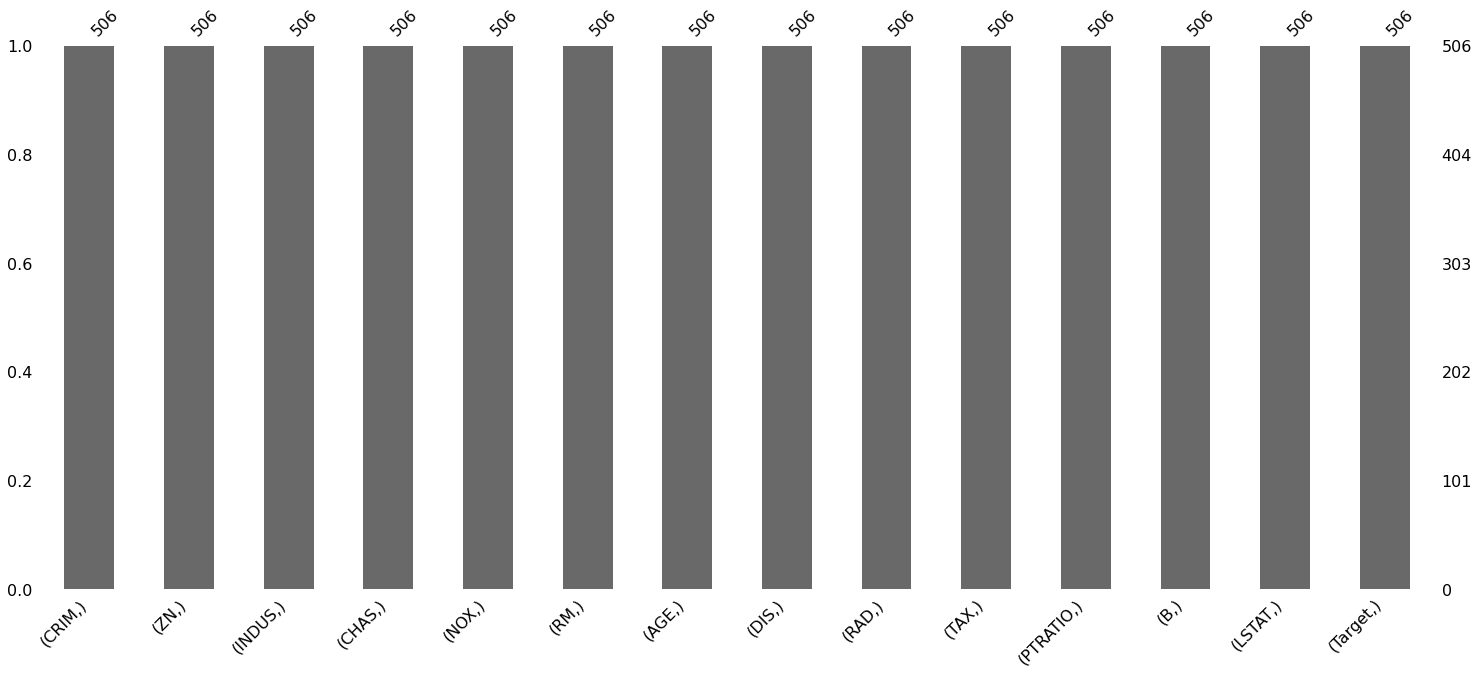

In [5]:
import missingno as msno
msno.bar(df)

## Data split

In [6]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size = .2,random_state = 42)

In [7]:
train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13.4
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66,19.5
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00,21.1
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99,24.5
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27,13.4


In [8]:
test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9
436,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05,9.6
411,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24.0,666.0,20.2,35.05,21.22,17.2
86,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86,22.5


In [9]:
train_x = train.drop('Target',axis=1)
train_y = train['Target']
test_x = test.drop('Target',axis=1)
test_y = test['Target']

## Linear Regeression

In [10]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(train_x,train_y)
pred_lin = lin.predict(test_x)

In [11]:
## 평가지표 = rmse
from sklearn.metrics import mean_squared_error
def rmse(true,pred):
    return np.sqrt(mean_squared_error(true,pred))

In [12]:
rmse(test_y,pred_lin)

4.928602182665327

## compare linear model

In [14]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
lin = LinearRegression()
las = Lasso()
rid = Ridge()
elast = ElasticNet()

compare_df = pd.DataFrame()
model_list = [lin,las,rid,elast]
col_names = ['linear','lasso','ridge','elastic']
for model,names in zip(model_list,col_names):
    model.fit(train_x,train_y)
    pred = model.predict(test_x)
    score = rmse(test_y,pred)
    compare_df.loc[0,names] = score
compare_df

,linear,lasso,ridge,elastic
0,4.928602,4.940596,4.947443,4.895787


In [30]:
def show_height(ax,fontsize=10):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height+0.001,'{:.2f}'.format(height) ,ha="center",fontsize=fontsize)

(4.885787292173219, 4.957442897872461)

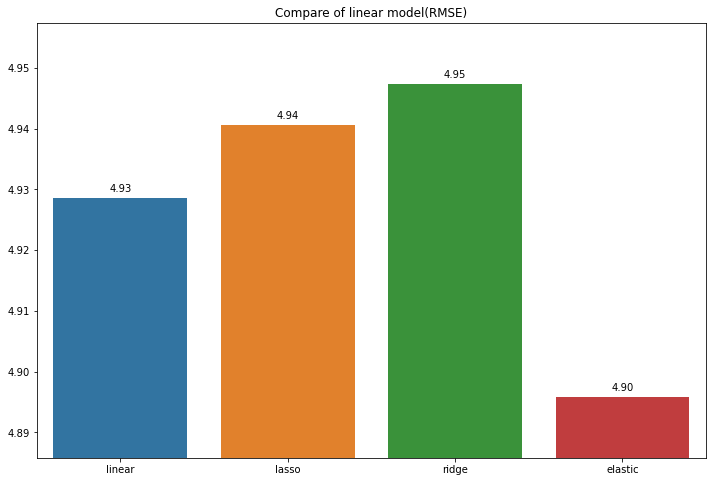

In [31]:
plt.figure(figsize=(12,8))
plt.title('Compare of linear model(RMSE)')

ax = sns.barplot(x = compare_df.columns,y=compare_df.values[0])
show_height(ax)
plt.ylim([compare_df.iloc[0].min() - 0.01,compare_df.iloc[0].max() + 0.01])

## 다중회귀

In [32]:
from sklearn.datasets import make_regression
# 샘플개수: 100
# 절편은 -5
# 독립변수 개수: 2개
# 노이즈 10(회귀식으로 설명할 수 없는 것)
# coef : 변수 계수 반환 여부
# 반환값 3개: 입력변수, 종속변수, (계수)
X0,y,coef=make_regression(n_samples=100, n_features=2,bias=-5,noise=10,coef=True, random_state=2)

In [36]:
import statsmodels.api as sm

X=sm.add_constant(X0)
sm_model1=sm.OLS(y,X)
sm_result1=sm_model1.fit()
print(sm_result1.summary())

AttributeError: 'LinearRegression' object has no attribute 'summary'

Text(0.5, 1.0, 'Residual plot between x2 and residual')

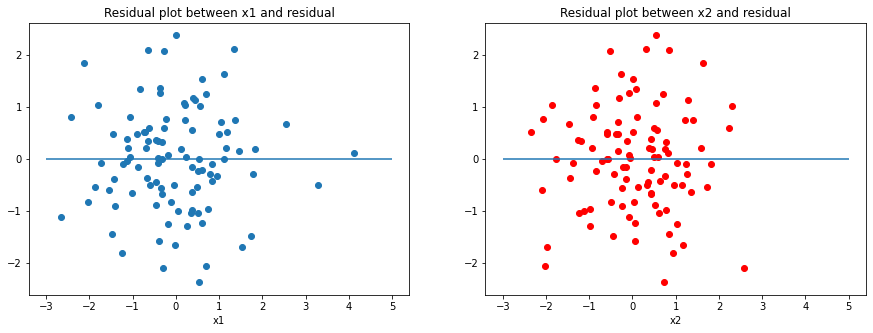

In [34]:
plt.figure(figsize=(15,5))
ax1= plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)

ax1.scatter(X0[:,0],sm_result1.resid_pearson)
ax1.hlines(y=0,xmin=-3,xmax=5)
ax1.set_xlabel('x1')
ax1.set_title('Residual plot between x1 and residual')

ax2.scatter(X0[:,1],sm_result1.resid_pearson,color='r')
ax2.hlines(y=0,xmin=-3,xmax=5)
ax2.set_xlabel('x2')
ax2.set_title('Residual plot between x2 and residual')

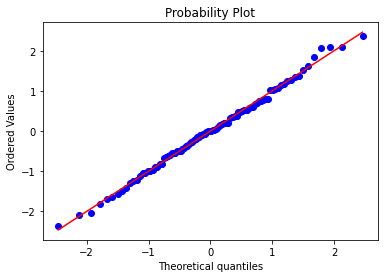

In [35]:
# 잔차의 정규성 검정2 - 시각화2 ( 잔차는 정규분포를 따른다)
# QQplot
import scipy as sp

sp.stats.probplot(sm_result1.resid_pearson,plot=plt)
plt.show()

## Logistic Regression

In [42]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data,columns=[cancer.feature_names.tolist()])
cancer_df['Target'] = cancer.target

In [44]:
train,test = train_test_split(cancer_df,test_size = .2,random_state = 42)
train_x = train.drop('Target',axis=1)
train_y = train['Target']
test_x = test.drop('Target',axis=1)
test_y = test['Target']

In [47]:
from sklearn.linear_model import LogisticRegression
logist = LogisticRegression()
logist.fit(train_x,train_y)
pred = logist.predict(test_x)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

